# CS 39aa Final Project Part 1

## Introduction/Background
_This project is based off a data set given by Kaggle "Coronavirus tweets NLP - Text Classification." These tweets have been pulled from twitter and categorized accordingly such as the date, location, original tweet message, and sentiment. The data was given in two different sets of data. One data set as the training for training your data, and the other as the testing for testing and validating the data. This problem is a multi-class text classification problem meaning that the goal of this project is to project whether a certain tweet within the dataset is a "positive", "negative", "extremely positive", "extremely negative", or "neutral" tweet based on the words that were used within the tweet._


## Exploratory Data Analysis


In [1]:
import pandas as pd

test_data = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_test.csv')
train_data = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding= 'ISO-8859-1')
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [2]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Here we drop the username, screenname, location, and tweetat columns because they hold no value in trying to solve the sentiment of the tweet.

In [3]:
train_data.drop(columns = ['UserName','ScreenName','Location','TweetAt'], inplace=True)
test_data.drop(columns = ['UserName','ScreenName','Location','TweetAt'], inplace=True)

We find the sentiment precentage of the training and testing data sets

In [4]:
test_data.Sentiment.value_counts(normalize = True)

Negative              0.274092
Positive              0.249342
Neutral               0.162981
Extremely Positive    0.157715
Extremely Negative    0.155872
Name: Sentiment, dtype: float64

In [5]:
train_data.Sentiment.value_counts(normalize = True)

Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: Sentiment, dtype: float64

In [6]:
train_data.shape

(41157, 2)

In [7]:
test_data.shape

(3798, 2)

We tokenize each word of the tweet adding it as a new column to the dataset

In [8]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()
train_data['tokens_raw'] = train_data['OriginalTweet'].apply(lambda x: tk.tokenize(x.lower()))
train_data.head()

,OriginalTweet,Sentiment,tokens_raw
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@menyrbie, @phil_gahan, @chrisitv, https://t...."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, :, woolworths, to, gi..."
3,My food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[me, ,, ready, to, go, at, supermarket, during..."


In [9]:
test_data['tokens_raw'] = test_data['OriginalTweet'].apply(lambda x: tk.tokenize(x.lower()))
test_data.head()

,OriginalTweet,Sentiment,tokens_raw
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,"[trending, :, new, yorkers, encounter, empty, ..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[when, i, couldn't, find, hand, sanitizer, at,..."
2,Find out how you can protect yourself and love...,Extremely Positive,"[find, out, how, you, can, protect, yourself, ..."
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[#panic, buying, hits, #newyork, city, as, anx..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[#toiletpaper, #dunnypaper, #coronavirus, #cor..."


This takes out any unnecessary token words that we don't want in our dataset such as "the", "to", "I", or any punctuation 

In [10]:
import re
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
removechars = set(['.','/','!','/','?',':',';'])
train_data['tokens_raw'] = train_data['tokens_raw'].apply(lambda x: [w for w in x if w not in stop])
train_data['tokens_raw'] = train_data['tokens_raw'].apply(lambda x: [w for w in x if w not in removechars])
train_data['tokens_raw'] = train_data['tokens_raw'].apply(lambda x: [w for w in x if not re.match('^#', w)])
train_data.head()

,OriginalTweet,Sentiment,tokens_raw
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@menyrbie, @phil_gahan, @chrisitv, https://t...."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, ..., please, ,, pani..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[,, ready, go, supermarket, outbreak, i'm, par..."


In [11]:
test_data['tokens_raw'] = test_data['tokens_raw'].apply(lambda x: [w for w in x if w not in stop])
test_data['tokens_raw'] = test_data['tokens_raw'].apply(lambda x: [w for w in x if w not in removechars])
test_data['tokens_raw'] = test_data['tokens_raw'].apply(lambda x: [w for w in x if not re.match('^#', w)])
test_data.head()

,OriginalTweet,Sentiment,tokens_raw
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,"[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, ,, turned..."
2,Find out how you can protect yourself and love...,Extremely Positive,"[find, protect, loved, ones]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[buying, hits, city, anxious, shoppers, stock,..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[one, week, everyone, buying, baby, milk, powd..."


Instead of having the same words in different forms have their own token value, we group all of those words together to be only one token value.

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
train_data['tokens'] = train_data['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w, pos="v") for w in x])
train_data.head()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


,OriginalTweet,Sentiment,tokens_raw,tokens
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@menyrbie, @phil_gahan, @chrisitv, https://t....","[@menyrbie, @phil_gahan, @chrisitv, https://t...."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, ..., please, ,, pani...","[food, stock, one, empty, ..., please, ,, pani..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[,, ready, go, supermarket, outbreak, i'm, par...","[,, ready, go, supermarket, outbreak, i'm, par..."


In [13]:
test_data['tokens'] = test_data['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w, pos="v") for w in x])
test_data.head()

,OriginalTweet,Sentiment,tokens_raw,tokens
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,"[trending, new, yorkers, encounter, empty, sup...","[trend, new, yorkers, encounter, empty, superm..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,"[find, hand, sanitizer, fred, meyer, ,, turned...","[find, hand, sanitizer, fred, meyer, ,, turn, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,"[find, protect, loved, ones]","[find, protect, love, ones]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,"[buying, hits, city, anxious, shoppers, stock,...","[buy, hit, city, anxious, shoppers, stock, foo..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"[one, week, everyone, buying, baby, milk, powd...","[one, week, everyone, buy, baby, milk, powder,..."


Make a vocabulary for all the words that are in our training data set, and we keep track how much they appear all together, and how much they appear in each tweet that is positive, negative, extremely positive, extremely negative, and neutral.

In [14]:
train_pos = train_data[train_data['Sentiment'] == 'Positive']
train_expos = train_data[train_data['Sentiment'] == 'Extremely Positive']
train_neg = train_data[train_data['Sentiment'] == 'Negative']
train_exneg = train_data[train_data['Sentiment'] == 'Extremely Negative']
train_neu = train_data[train_data['Sentiment'] == 'Neutral']

def vocab_list(tokens_column):
    vocab = dict()
    for tweet_tokens in tokens_column:
        for token in tweet_tokens:
            if token not in vocab:
                vocab[token] = 1
            else:
                vocab[token] += 1
    return vocab

vocab_all = dict(sorted(vocab_list(train_data['tokens']).items(), key=lambda item: item[1], reverse=True))
vocab_pos = dict(sorted(vocab_list(train_pos['tokens']).items(), key=lambda item: item[1], reverse=True))
vocab_expos = dict(sorted(vocab_list(train_expos['tokens']).items(), key=lambda item: item[1], reverse=True))
vocab_neg = dict(sorted(vocab_list(train_neg['tokens']).items(), key=lambda item: item[1], reverse=True))
vocab_exneg = dict(sorted(vocab_list(train_exneg['tokens']).items(), key=lambda item: item[1], reverse=True))
vocab_neu = dict(sorted(vocab_list(train_neu['tokens']).items(), key=lambda item: item[1], reverse=True))
print(f"All tokens: {len(vocab_all)}, Pos: {len(vocab_pos)}, Ex Pos: {len(vocab_expos)}, Neg: {len(vocab_neg)}, Ex Neg: {len(vocab_exneg)}, Neu: {len(vocab_neu)}")

All tokens: 67595, Pos: 26716, Ex Pos: 18154, Neg: 23488, Ex Neg: 15277, Neu: 19492


In [15]:
list(vocab_all.items())[:20]

[(',', 28642),
 ('19', 12249),
 ('-', 11511),
 ('covid', 10607),
 ('price', 8957),
 ('store', 8161),
 ('\x92', 7155),
 ('food', 6826),
 ('supermarket', 6686),
 ('grocery', 6087),
 ('people', 5528),
 ('go', 5332),
 ('shop', 4875),
 ('get', 4467),
 ('consumer', 4274),
 ('&', 3837),
 ('need', 3546),
 ('"', 3404),
 ('buy', 3370),
 ('â', 3358)]

In [16]:
top_n_to_remove = 1000
for i, item in enumerate(vocab_all.items()):
    if i == top_n_to_remove:
        break
    if item[0] in vocab_pos:
        del vocab_pos[item[0]]
    if item[0] in vocab_expos:
        del vocab_expos[item[0]]
    if item[0] in vocab_neg:
        del vocab_neg[item[0]]
    if item[0] in vocab_exneg:
        del vocab_exneg[item[0]]
    if item[0] in vocab_neu:
        del vocab_neu[item[0]]

In [17]:
list(vocab_pos.items())[:20]

[('novel', 59),
 ('greater', 49),
 ('epidemic', 48),
 ('behaviors', 46),
 ('distribute', 45),
 ('fair', 44),
 ('surface', 44),
 ('significant', 43),
 ('page', 42),
 ('highlight', 41),
 ('approve', 41),
 ('industries', 41),
 ('hop', 41),
 ('traffic', 41),
 ('recently', 40),
 ('aware', 39),
 ('teachers', 39),
 ('husband', 39),
 ('dm', 39),
 ('sanitiser', 38)]

In [18]:
list(vocab_expos.items())[:20]

[('grateful', 65),
 ('super', 59),
 ('win', 50),
 ('enjoy', 50),
 ('trust', 50),
 ('fun', 46),
 ('safely', 45),
 ('lol', 43),
 ('smart', 43),
 ('proud', 42),
 ('bless', 42),
 ('kindly', 41),
 ('truly', 41),
 ('rt', 40),
 ('professionals', 40),
 ('helpful', 40),
 ('solution', 39),
 ('smile', 39),
 ('greater', 38),
 ('commit', 38)]

In [19]:
list(vocab_neg.items())[:20]

[('uncertainty', 53),
 ('damn', 50),
 ('export', 47),
 ('lowest', 46),
 ('file', 44),
 ('problems', 43),
 ('fell', 42),
 ('officials', 41),
 ('arabia', 40),
 ('complete', 39),
 ('strain', 38),
 ('threat', 38),
 ('inflation', 37),
 ('suspend', 37),
 ('barrel', 37),
 ('dairy', 37),
 ('hereâ', 36),
 ('chicken', 36),
 ('output', 36),
 ('largest', 36)]

In [20]:
list(vocab_exneg.items())[:20]

[('fraud', 68),
 ('greedy', 63),
 ('hell', 62),
 ('stupid', 60),
 ('attack', 59),
 ('steal', 59),
 ('disgust', 55),
 ('sad', 55),
 ('exploit', 50),
 ('destroy', 49),
 ('threat', 47),
 ('negative', 46),
 ('cry', 45),
 ('ass', 44),
 ('dead', 43),
 ('wtf', 43),
 ('lowest', 43),
 ('hunger', 43),
 ('chaos', 42),
 ('hurt', 42)]

In [21]:
list(vocab_neu.items())[:20]

[('_', 54),
 ('property', 36),
 ('california', 32),
 ('@youtube', 30),
 ('ticket', 29),
 ('jump', 29),
 ('11', 28),
 ('©', 27),
 ('guidance', 27),
 ('reveal', 27),
 ('series', 26),
 ('arrive', 26),
 ('platform', 26),
 ('de', 26),
 ('¼', 26),
 ('locations', 25),
 ('mark', 25),
 ('boom', 25),
 ('mall', 25),
 ('friday', 24)]

Change the from of the observation from tokens into a string so we can use the vectorizer function

In [22]:
train_data['textclean'] = train_data['tokens'].apply(lambda x: ' '.join(x))
train_data.head()

,OriginalTweet,Sentiment,tokens_raw,tokens,textclean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@menyrbie, @phil_gahan, @chrisitv, https://t....","[@menyrbie, @phil_gahan, @chrisitv, https://t....",@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph...",advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworths, give, eld...",coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, ..., please, ,, pani...","[food, stock, one, empty, ..., please, ,, pani...","food stock one empty ... please , panic , enou..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[,, ready, go, supermarket, outbreak, i'm, par...","[,, ready, go, supermarket, outbreak, i'm, par...",", ready go supermarket outbreak i'm paranoid ,..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['textclean']).toarray()
print(f"X_train.shape = {X_train.shape}")

X_train.shape = (41157, 64082)


In [24]:
y_train = train_data.Sentiment.to_numpy()
y_train[:10]

array(['Neutral', 'Positive', 'Positive', 'Positive',
       'Extremely Negative', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Negative'], dtype=object)

accuracy: 1.0000


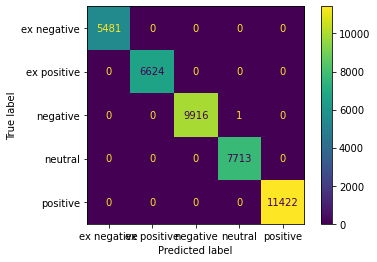

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
model = RandomForestClassifier(n_estimators=100)
model = model.fit(X_train, y_train)

pred_train = model.predict(X_train)

display = ConfusionMatrixDisplay(confusion_matrix(train_data['Sentiment'], pred_train), display_labels=['ex negative','ex positive','negative','neutral','positive'])
display.plot()
print(f"accuracy: {accuracy_score(train_data['Sentiment'],pred_train):.4f}")

In [26]:
test_data['textclean'] = test_data['tokens'].apply(lambda x: ' '.join(x))
X_test = tfidf_vectorizer.transform(test_data['textclean']).toarray()
X_test.shape

(3798, 64082)

accuracy: 0.4942


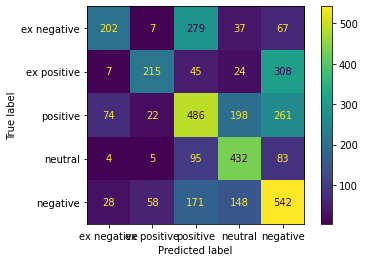

In [27]:
pred_test = model.predict(X_test)

display = ConfusionMatrixDisplay(confusion_matrix(test_data['Sentiment'], pred_test), display_labels=['ex negative','ex positive','positive','neutral','negative'])
display.plot()
print(f"accuracy: {accuracy_score(test_data['Sentiment'],pred_test):.4f}")